# FORECASTING for AIR-LINES Data-Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

In [9]:
data = pd.read_excel('Airlines+Data.xlsx')

In [10]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [12]:
dates = pd.date_range(start='1995-01-01', freq='MS',periods=len(data))

In [13]:
dates

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [14]:
data['Month'] = dates.month
data['Year'] = dates.year

In [15]:
data.head()

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995


In [16]:
data.dtypes

Month         int64
Passengers    int64
Year          int64
dtype: object

In [17]:
import calendar
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data.rename({'#data':'data'},axis=1,inplace=True)
data = data[['Month','Year','Passengers']]

In [18]:
data.head()

,Month,Year,Passengers
0,Jan,1995,112
1,Feb,1995,118
2,Mar,1995,132
3,Apr,1995,129
4,May,1995,121


In [19]:
data['Date'] = dates
data.set_index('Date',inplace=True)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_16024/901187134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = dates


In [20]:
data.head()

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


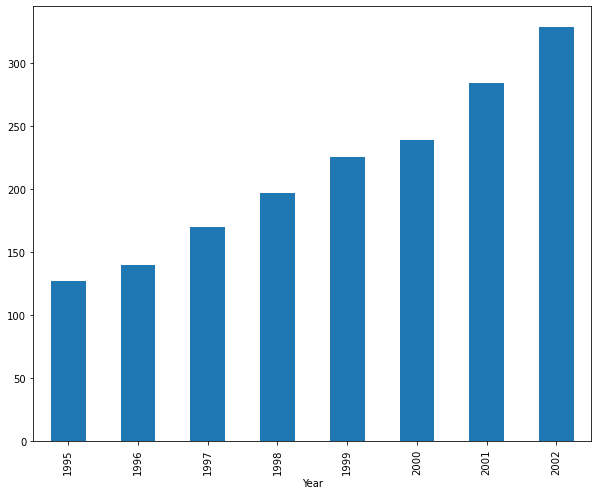

In [22]:
plt.figure(figsize=(10,8))
data.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

In [23]:
print('From the above figure we can see that passengers are increasing with the increase in the year')

From the above figure we can see that passengers are increasing with the increase in the year


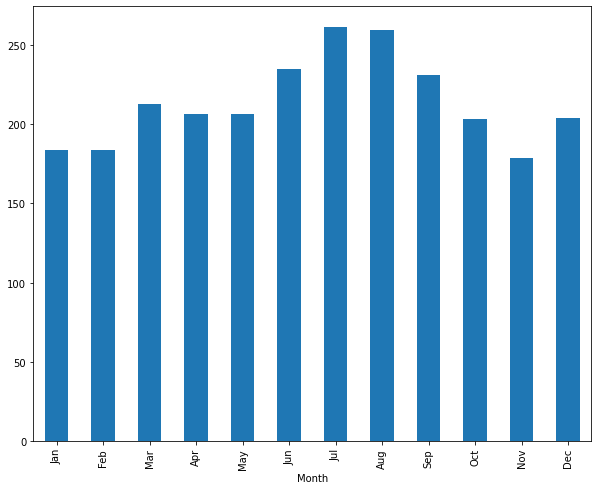

In [25]:
plt.figure(figsize=(10,8))
data.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

In [26]:
print('From the above figure we can see that more passengers can be seen between months June to September.')

From the above figure we can see that more passengers can be seen between months June to September.


In [28]:
data_count = data['Passengers']

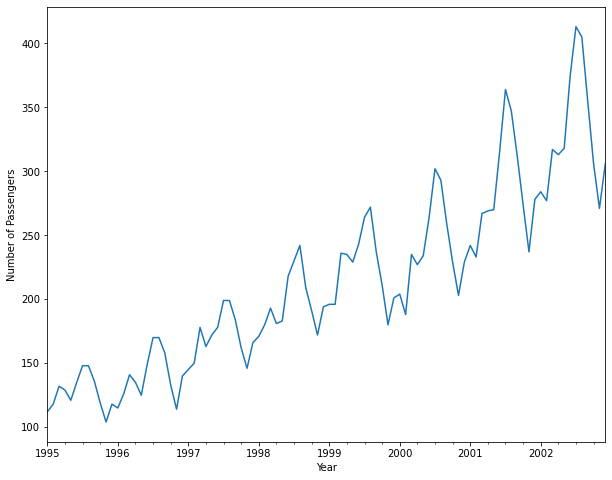

In [30]:
plt.figure(figsize=(10,8))
data_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [31]:
decompose = sm.tsa.seasonal_decompose(data_count,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

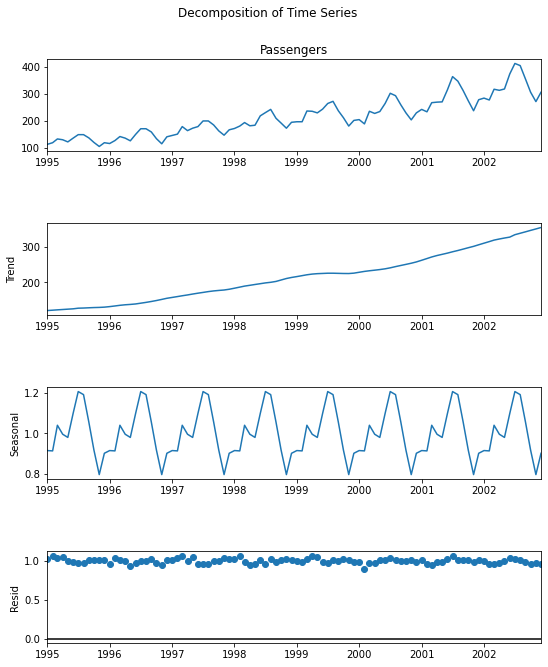

In [32]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

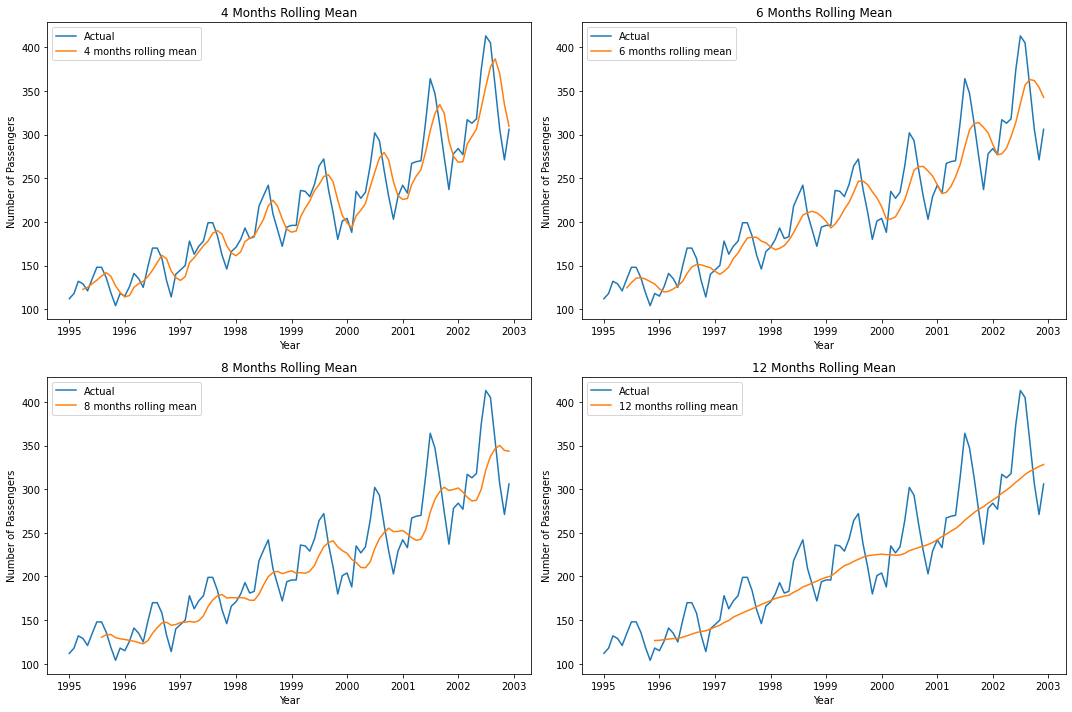

In [38]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(data.index,data_count,label='Actual')
axes[0][0].plot(data.index,data_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')

axes[0][1].plot(data.index,data_count,label='Actual')
axes[0][1].plot(data.index,data_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')

axes[1][0].plot(data.index,data_count,label='Actual')
axes[1][0].plot(data.index,data_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')

axes[1][1].plot(data.index,data_count,label='Actual')
axes[1][1].plot(data.index,data_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [46]:
data.head()

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


In [49]:
monthly = pd.pivot_table(data=data,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [50]:
monthly

Year,1995,1996,1997,1998,1999,2000,2001,2002
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


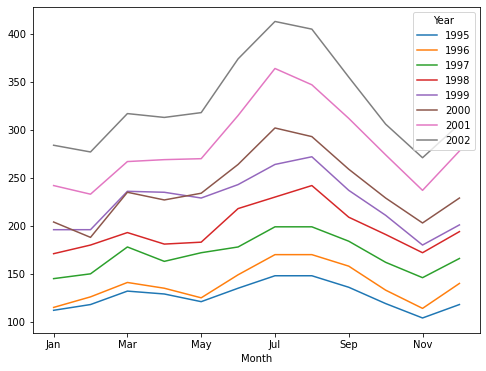

In [51]:
monthly.plot(figsize=(8,6))
plt.show()

In [52]:
yearly = pd.pivot_table(data=data,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [53]:
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


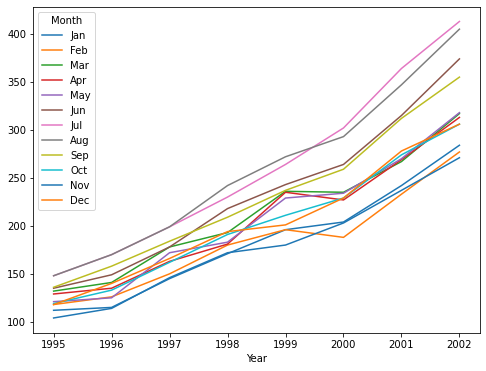

In [54]:
yearly.plot(figsize=(8,6))
plt.show()

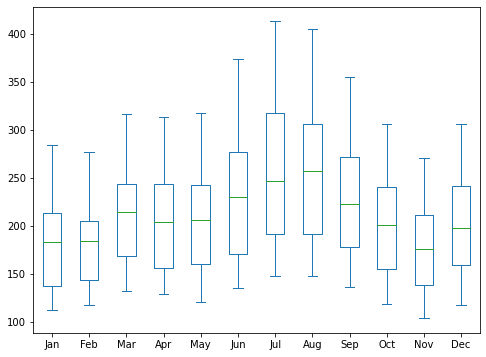

In [55]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

In [56]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_count)

(1.3402479596467023,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [57]:
adfuller_results = pd.Series(adfuller(data_count)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(data_count)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                    1.340248
p-value                    0.996825
lags used                 12.000000
Number of observations    83.000000
Critical Value 1%         -3.511712
Critical Value 5%         -2.897048
Critical Value 10%        -2.585713
dtype: float64


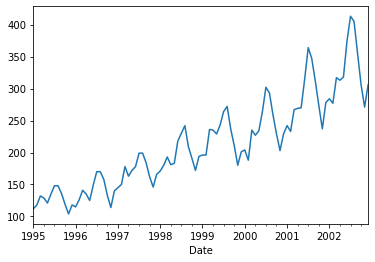

In [58]:
data_count.plot()
plt.show()

In [59]:
passengers_log = np.log10(data_count)

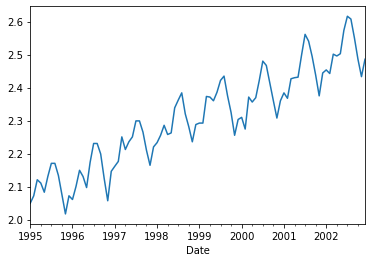

In [60]:
passengers_log.plot()
plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_log)
adfuller_results = pd.Series(adfuller(passengers_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -0.723027
p-value                    0.840695
lags used                 12.000000
Number of observations    83.000000
Critical Value (1%)       -3.511712
Critical Value (5%)       -2.897048
Critical Value (10%)      -2.585713
dtype: float64


In [63]:
diff1 = data_count.diff(1)
diff1.head()

Date
1995-01-01     NaN
1995-02-01     6.0
1995-03-01    14.0
1995-04-01    -3.0
1995-05-01    -8.0
Name: Passengers, dtype: float64

In [64]:
diff1.dropna(axis=0,inplace=True)

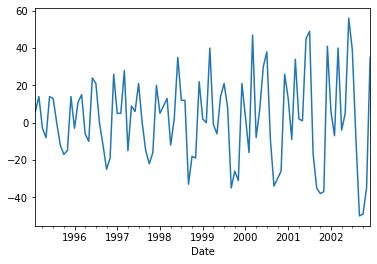

In [65]:
diff1.plot()
plt.show()

In [66]:
from statsmodels.tsa.stattools import adfuller
adfuller(diff1)
adfuller_results = pd.Series(adfuller(diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.150002
p-value                    0.224889
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [67]:
log_diff1 = passengers_log.diff(1)
log_diff1.head()

Date
1995-01-01         NaN
1995-02-01    0.022664
1995-03-01    0.048692
1995-04-01   -0.009984
1995-05-01   -0.027804
Name: Passengers, dtype: float64

In [68]:
log_diff1.dropna(axis=0,inplace=True)

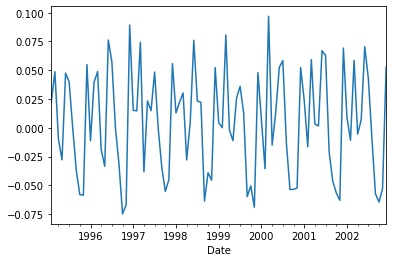

In [69]:
log_diff1.plot()
plt.show()

In [70]:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.670823
p-value                    0.079225
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [71]:
log_diff2 = passengers_log.diff(2)
log_diff2.head()

Date
1995-01-01         NaN
1995-02-01         NaN
1995-03-01    0.071356
1995-04-01    0.038708
1995-05-01   -0.037789
Name: Passengers, dtype: float64

In [72]:
log_diff2.dropna(axis=0,inplace=True)

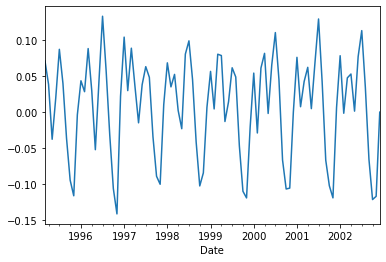

In [73]:
log_diff2.plot()
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff2)
adfuller_results = pd.Series(adfuller(log_diff2)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff2)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.787629
p-value                    0.060063
lags used                 11.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [75]:
import itertools
p = q = range(0, 3)
d = range(0,1)
pdq = list(itertools.product(p, d, q))

In [76]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [77]:
D = range(0,3)
P = Q = range(0, 3) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [78]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [99]:
sarima = sm.tsa.statespace.SARIMAX(log_diff2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [100]:
sarima_results = sarima.fit()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [101]:
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   94
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 205.571
Date:                            Sat, 03 Jun 2023   AIC                           -401.141
Time:                                    10:22:33   BIC                           -389.231
Sample:                                03-01-1995   HQIC                          -396.366
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3152      0.118     -2.673      0.008      -0.546      -0.084
ma.L1          0.9998     18.629   

In [102]:
data_count.tail(15)

Date
2001-10-01    274
2001-11-01    237
2001-12-01    278
2002-01-01    284
2002-02-01    277
2002-03-01    317
2002-04-01    313
2002-05-01    318
2002-06-01    374
2002-07-01    413
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, dtype: int64

In [104]:
prediction = sarima_results.get_prediction(data=pd.to_datetime('1960-01-01'),full_results=True)

In [105]:
prediction.predicted_mean

1995-03-01    0.000000
1995-04-01   -0.022488
1995-05-01   -0.012199
1995-06-01    0.011909
1995-07-01   -0.006222
                ...   
2002-08-01    0.037013
2002-09-01   -0.056043
2002-10-01   -0.109983
2002-11-01   -0.117696
2002-12-01    0.003464
Freq: MS, Name: predicted_mean, Length: 94, dtype: float64

In [111]:
predicted_values = np.power(10,prediction.predicted_mean)

In [112]:
predicted_values

1995-03-01    1.000000
1995-04-01    0.949537
1995-05-01    0.972302
1995-06-01    1.027802
1995-07-01    0.985774
                ...   
2002-08-01    1.088962
2002-09-01    0.878935
2002-10-01    0.776277
2002-11-01    0.762613
2002-12-01    1.008008
Freq: MS, Name: predicted_mean, Length: 94, dtype: float64

In [106]:
actual = data_count['1960-01-01':]

In [107]:
actual

Date
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [113]:
mape = np.mean(np.abs(actual - predicted_values)/actual)
mape

0.9947609111698716

In [114]:
mse = np.mean((actual - predicted_values) ** 2)
mse

51142.087323282525

In [115]:
n_steps = 36
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) 
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) 
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [116]:
pred_ci_99.head()

,lower Passengers,upper Passengers
2003-01-01,0.034234,0.102563
2003-02-01,-0.038542,0.043520
2003-03-01,0.012618,0.095920
2003-04-01,0.015622,0.099037
2003-05-01,-0.045415,0.038006


In [117]:
pred_ci_95.head()

,lower Passengers,upper Passengers
2003-01-01,0.034234,0.102563
2003-02-01,-0.038542,0.043520
2003-03-01,0.012618,0.095920
2003-04-01,0.015622,0.099037
2003-05-01,-0.045415,0.038006


In [119]:
n_steps = 36
idx = pd.date_range(data_count.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [120]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2002-12-01,1.170573,1.082016,1.266378
2003-01-01,1.005747,0.915077,1.105401
2003-02-01,1.133102,1.029480,1.247155
2003-03-01,1.141115,1.036626,1.256137
2003-04-01,0.991506,0.900710,1.091455


In [121]:
fc_99.head()

,lower_ci_99,upper_ci_99
2002-12-01,1.082016,1.266378
2003-01-01,0.915077,1.105401
2003-02-01,1.029480,1.247155
2003-03-01,1.036626,1.256137
2003-04-01,0.900710,1.091455


In [122]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] 
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2002-12-01,1.170573,1.082016,1.266378,1.082016,1.266378
2003-01-01,1.005747,0.915077,1.105401,0.915077,1.105401
2003-02-01,1.133102,1.029480,1.247155,1.029480,1.247155
2003-03-01,1.141115,1.036626,1.256137,1.036626,1.256137
2003-04-01,0.991506,0.900710,1.091455,0.900710,1.091455


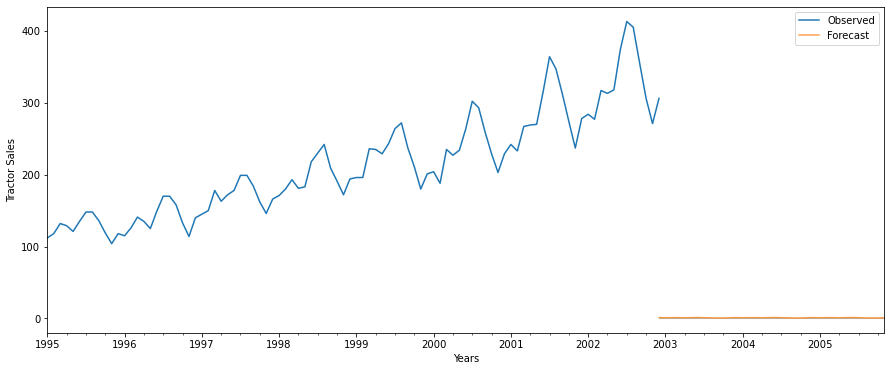

In [123]:
axis = data_count.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


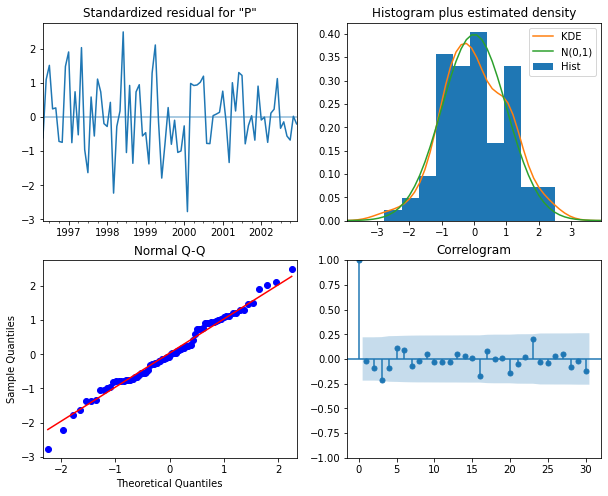

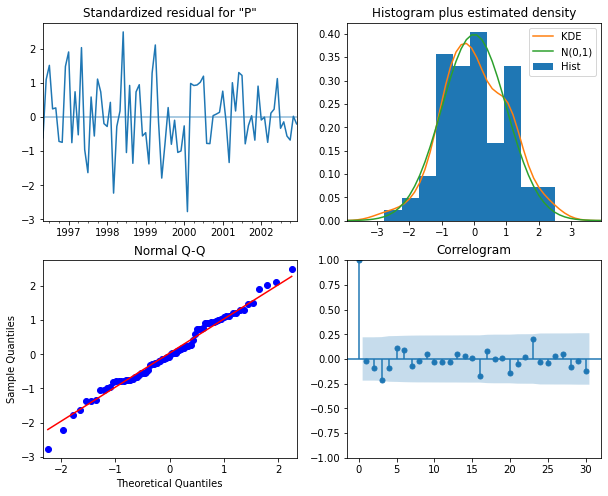

In [124]:
sarima_results.plot_diagnostics(lags=30,figsize=(10,8))